<a href="https://colab.research.google.com/github/WebsterDaka/lab2-html/blob/main/Project_Classifier(Speakers_Rullings).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parliamentary Speaker's Rulings Classification Project

This project aims to develop an automated text classification system to categorize Speaker's Rulings from the National Assembly of Zambia into predefined categories, enhancing accessibility for legal, parliamentary, and public use.


# **1. Business Understanding**
---


## Problem Statement
The National Assembly of Zambia generates substantial volumes of parliamentary proceedings containing Speaker's Rulings on various procedural, disciplinary, and administrative matters. Currently, accessing and categorizing these rulings for legal research, parliamentary reference, and civic education requires extensive manual effort. Legal professionals, researchers, parliamentary staff, and citizens face significant challenges in efficiently locating relevant precedents and understanding patterns in parliamentary decision-making.
### Core Problem:
There is no automated system to classify and categorize Speaker's Rulings from Zambian parliamentary proceedings, making legal and legislative information retrieval inefficient and limiting effective civic education and parliamentary research.

## 1. Business Objectives

### Primary Objectives:
1. To classify parliamentary rulings into a structured system that is simpler to analyze and
evaluate  
2. Organize speakers' rulings to improve accessibility and quick retrieval for legal
professionals, researchers, and public understanding.

### Success Criteria from Business Perspective:
- Reduce time spent by legal professionals searching for relevant rulings by at least 60%
- Enable non-experts to find and understand parliamentary rulings relevant to their interests
- Provide parliamentary staff with consistent categorization for improved procedural reference
- Support academic and policy research through structured access to historical ruling patterns

---
## 2. Data Mining Goals
### Specific Technical Objectives
1. **Build a Multi-class Classification Model:**  
   Develop a machine learning system that automatically categorizes Speaker's Rulings into predefined categories such as:
    - **Procedural Rulings** (e.g., points of order, procedural motions)
    - **Disciplinary Actions** (e.g., member conduct, sanctions)
    - **Administrative Decisions** (e.g., scheduling, resource allocation)
    - **Constitutional Interpretations** (e.g., constitutional questions, legal precedents)
    - **Debate Management** (e.g., time allocation, speaking order)

2. **Implement Natural Language Processing (NLP):**  
   Apply text mining techniques to extract meaningful features from parliamentary text documents, enabling accurate classification.

3. Create automated pipeline for new ruling classification.

**Technical Success Metrics**
* Accuracy: Achieve at least 80% overall classification accuracy across all ruling categories
* Precision: Maintain precision above 75% for each individual category to ensure reliable
categorization
* F1-Score: Target F1-score above 77% for balanced precision-recall performance
---
## 3. Project Success Criteria
### Quantitative Criteria
1. **Model Performance:** Overall classification accuracy ≥ 80%
2. **Processing Speed:** System should classify new documents within 5 seconds

### Business Impact Measures:
- Reduction in manual categorization time
- Increased usage of parliamentary information by researchers and citizens
- Improved consistency in referencing past rulings by parliamentary staff
- Enhanced accessibility of legal and legislative information for civic education

---
## 4. Project Scope
### in Scope:
- Speaker's Rulings from National Assembly of Zambia proceedings
- Text-based classification using parliamentary Hansards and official records
- English language processing
### Out of Scope:
- Rulings from other parliamentary bodies or courts
- Non-English parliamentary proceedings
- Real-time audio/video processing of parliamentary sessions
- Legal advice or interpretation of ruling implications
### Constraints:
- Data availability limited to publicly accessible parliamentary records
- Solution must be cost-effective for potential implementation by parliamentary services
- Timeline constraints require deliverable completion by August 29, 2025



#**2. Data Understanding**

This notebook performs the **Data Understanding** phase for our data mining project using Google Colab.

We work with the **Speaker’s Rulings** dataset and perfom Explorative data analysis (EDA) on the data to gain an understanding on the data

## **Goals**
- Explore structure (shape, columns, types) and preview records.
- Profile data types, basic statistics, and distributions.
- Assess data quality (missing values, duplicates, inconsistencies).
- Summarize early insights and risks that will guide later preparation and modeling.



###**Data sources**
The main source of data for this project is [**The National Assembly Website**](https://www.parliament.gov.zm/publications/rulings)

The Data is publicly available and we perfomed initial data collection by scraping the website using python scripts

The Data is in form of article with a title and abstract text,
We extracted **Title**, **text**, **context** , and **standing orders**

Then we labled each rulling text into a **category** which is our target column




###**Mount Drive for persistence of the Dataset**
This allows to access the files directly and save work permanently.

Run the code cell below. It will prompt you to authorize access to your Google Drive. Follow the on-screen instructions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once mounted, you can see your entire Google Drive by navigating through the "Files" pane on the left. It will appear under the drive/MyDrive/ directory.


### **IMPORTANT NOTE**
For this project, you should create a folder in your Google Drive (e.g., `rullings_classifier_data`) and upload the  datasets into it:
>* `speaker_ruling_classification.csv`


 In this examples below, the file path used points to my own folder structure, for instance:
 >* `/content/drive/MyDrive/rulings_classifier_data`

 **You MUST replace this path with the correct path to the files in YOUR own Google Drive.** You can find the correct path by navigating to the file in the "Files" pane, right-clicking it, and selecting "Copy path".

###**Environtment Setup and Data Loading**

1. Importing the required python libraries
  - **pandas** for handling and exploring data
  - **pyplot** from matplotlib for plotting
2. Load the Speaker's Rulling dataset into a pandas DataFrame using `pd.read_csv()`

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt


#Load dataset into a DataFrame
file_path = "/content/drive/MyDrive/rulings_classifier_data/speaker_ruling_classification.csv"
ruling_df = pd.read_csv(file_path)



###**Basic Structure Analysis**   

In this step, we examine the **basic structure** of the dataset to understand its size and scope.

- **Dataset shape**: Number of rows and columns
- **Total data points**: Rows * Columns.  

This helps us estimate data volume and complexity before diving deeper.


In [ ]:
#Datashape
print("Dataset shape:", ruling_df.shape)

#Number of row (rulings)
print("Number of rows(rulings):", ruling_df.shape[0])

#Number of columns (features)
print("Number of columns(features):", ruling_df.shape[1])

#Total data points
print("Total data points:", ruling_df.shape[0] * ruling_df.shape[1])


Dataset shape: (143, 5)
Number of rows(rulings): 143
Number of columns(features): 5
Total data points: 715


### **Column Structure Examination**

To better understand the dataset, we analyze its **columns and data types**:

- **`df.info()` summary** showing:  
   - Column names  
   - Number of non-null entries per column  
   - Data types of each column  
   - Memory usage  



In [ ]:
#showing list of columns
print("List of columns:")
for i , col in enumerate(ruling_df.columns,start=1):
  print(f"{i}.{col}")
print("\n")



# showing a concise data summary including datatypes
print("Summary of dataset:")
ruling_df.info()

List of columns:
1.rulingTitle
2.rulingText
3.context
4.categories
5.standingOrder


Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rulingTitle    143 non-null    object
 1   rulingText     142 non-null    object
 2   context        143 non-null    object
 3   categories     135 non-null    object
 4   standingOrder  121 non-null    object
dtypes: object(5)
memory usage: 5.7+ KB


###**Initial Data Preview**

A preview the dataset to gain a general sense of its content:

- Use **`df.head()`** to view the first records.  
- Use **`df.tail()`** to view the last records.

In [ ]:
#first 5 fow of the datase
ruling_df.head().T


,0,1,2,3,4
rulingTitle,RULING BY THE HONOURABLE MADAM SPEAKER ON A PO...,Ruling by Hon Madam Speaker - On a Point of Or...,RULING BY THE HONOURABLE MADAM SPEAKER ON A PO...,RULING BY THE HON MADAM FIRST DEPUTY SPEAKER O...,RULING BY THE HONOURABLE MADAM FIRST DEPUTY SP...
rulingText,Honourable Members will recall that on Tuesday...,"Hon Members will recall that on Tuesday, 15th ...","Honourable Members, the House will recall that...","Honourable Members, the House will recall that...","Honourable Members, the House will recall that..."
context,point of order,point of order,point of order,point of order,point of order
categories,"disciplinary actions, procedural rulings","disciplinary actions, procedural rulings","constitutional interpretations, procedural rul...",procedural rulings,"disciplinary actions, procedural rulings"
standingOrder,139,"223, 243",139,"215, 213","223, 140"


In [ ]:
#last 5 rows of the dataset
ruling_df.tail(5).T

,138,139,140,141,142
rulingTitle,RULING BY THE HON MR SPEAKER ON A POINT OF ORD...,RULING BY THE HON MR SPEAKER ON A POINT OF ORD...,RULING BY THE HON MR SPEAKER ON A POINT OF ORD...,RULING BY THE HON MR SPEAKER ON THE POINT OF O...,RULING BY THE HON MR SPEAKER ON A POINT OF ORD...
rulingText,"Hon Members will recall that on Tuesday, 27th ...","Hon Members will recall that on Tuesday, 27th ...","Hon Members will recall that on Tuesday, 20th ...","Hon Members will recall that on Tuesday, 3rd O...","Hon Members will recall that on Tuesday, 20th ..."
context,point of order,point of order,point of order,point of order,point of order
categories,"debate management, procedural rulings","disciplinary actions, procedural rulings","disciplinary actions, procedural rulings","debate management, procedural rulings","debate management, procedural rulings"
standingOrder,NaN,25,NaN,165,165


###**Categorical Data Analysis**
In this section we dive deeper in the Categorical columns *categories and context* columns to understand the distribution  within each column

####What We'll Analyze:

> - Value counts for each categorical column
> - Number of unique values per column
> - Most and least common categories

In [ ]:
#Count number of occurence for each category

print("Number of occurence for each category:")

categoriesCount = ruling_df['categories']
print(categoriesCount.value_counts())
print("\n")

Number of occurence for each category:
categories
procedural rulings                                                          69
disciplinary actions, procedural rulings                                    25
disciplinary actions                                                        22
constitutional interpretations, procedural rulings                           6
debate management, procedural rulings                                        6
constitutional interpretations, disciplinary actions, procedural rulings     3
administrative decisions, procedural rulings                                 1
administrative decisions                                                     1
constitutional interpretations, disciplinary actions                         1
constitutional interpretations                                               1
Name: count, dtype: int64




In [ ]:
##Counting number of unique values in categories columns

unique_category_values = ruling_df['categories'].unique()
print("unique values in categories columns:")
print(unique_category_values)
print("\n")
print("Number of unique values in categories columns:")
print(len(unique_category_values))

unique values in categories columns:
['disciplinary actions, procedural rulings'
 'constitutional interpretations, procedural rulings' 'procedural rulings'
 'constitutional interpretations, disciplinary actions, procedural rulings'
 'administrative decisions, procedural rulings'
 'debate management, procedural rulings' nan 'disciplinary actions'
 'administrative decisions'
 'constitutional interpretations, disciplinary actions'
 'constitutional interpretations']


Number of unique values in categories columns:
11


In [ ]:
#Count number of occurence for each context

print("Number of occurence for each context:")

contextsCount = ruling_df['context']
print(contextsCount.value_counts())
print("\n")

Number of occurence for each context:
context
point of order                        122
complaint                              16
guidance                                3
matter of urgent public importance      2
Name: count, dtype: int64




In [ ]:
#counting number of occurencies for each context

unique_context_values = ruling_df["context"].unique()
print("unique values in context columns:")
print(unique_context_values)
print("\n")
print("Number of unique values in context columns:")
print(len(unique_context_values))

unique values in context columns:
['point of order' 'complaint' 'guidance'
 'matter of urgent public importance']


Number of unique values in context columns:
4


###**Text Length and Word Count**
This section focuses on fining:
- The text length
- Word count
- Avarage word count for all the columns with paragraph
including **rullingText** and **rullingTitle**



In [ ]:
##creating a new column to hold the text length and column count for rulingTitle

ruling_df['ruling_title_text_length'] = ruling_df['rulingTitle'].str.len()
ruling_df['ruling_title_word_count'] = ruling_df['rulingTitle'].str.split().str.len()

display(ruling_df.head(2))

#finding the avarage word count and text length for the ruling title

avarage_word_count = ruling_df['ruling_title_word_count'].mean()
avarage_text_length = ruling_df['ruling_title_text_length'].mean()
print("\n")

print("Avarage word count: ", avarage_word_count.astype(int))
print("Avarage text length: ", avarage_text_length.astype(int))

###**Visual Analysis**
Using pyplot we will Create categorical visualizations
- Bar charts for top categorical variables
- Pie charts for proportional data
- Distribution plots for key categories

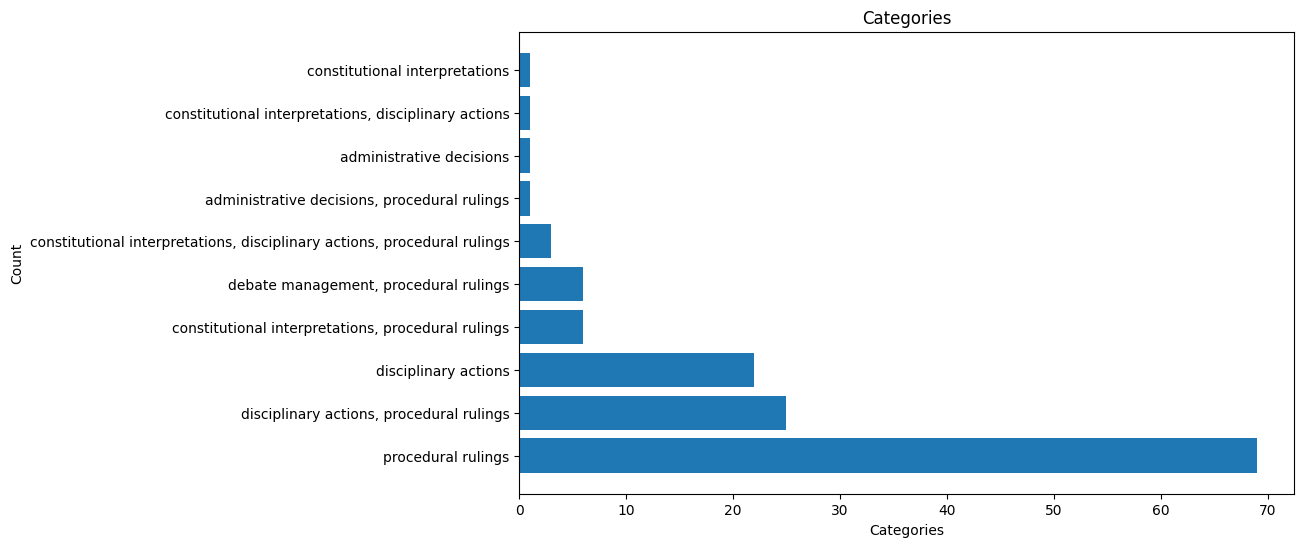

In [ ]:
# creating bar chart for categories column

categoriesCount = ruling_df['categories'].value_counts()

plt.figure(figsize=(10,6))
plt.title("Categories")
plt.xlabel("Categories")
plt.ylabel("Count")

plt.barh(categoriesCount.index, categoriesCount.values)
plt.show()

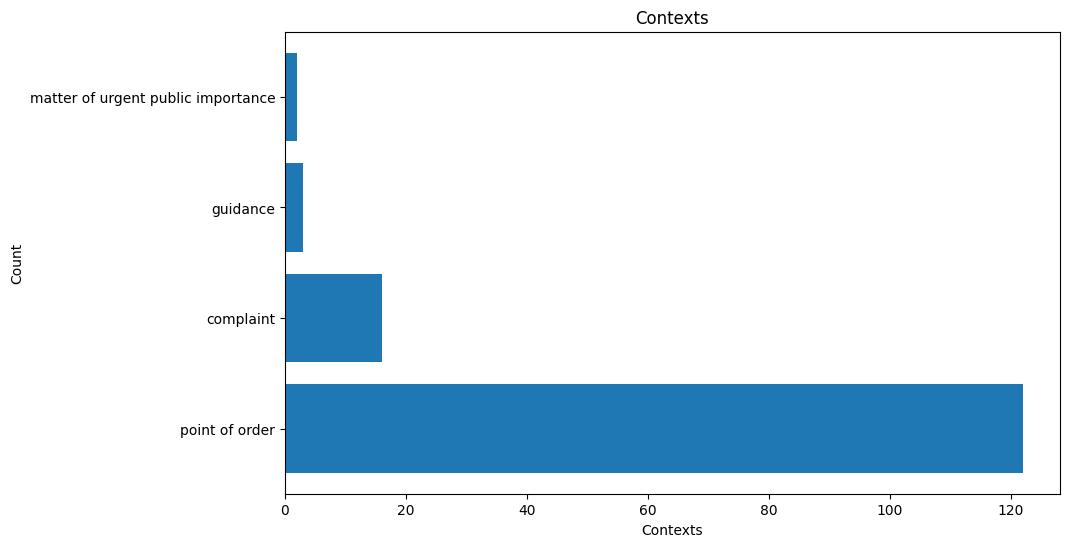

In [ ]:
# creating bar chart for context column

contextCount = ruling_df['context'].value_counts()

plt.figure(figsize=(10,6))
plt.title("Contexts")
plt.xlabel("Contexts")
plt.ylabel("Count")

plt.barh(contextCount.index, contextCount.values)
plt.show()


###**Feature relevance assessment**
Based on the understand and research made upon the dataset

we have identified that

**Most important features:**
>*  **rulingText:** This is the main body of the ruling, containing the richest semantic and contextual information.
>* ***context*** is very noisy it might contribute little.
>* ***categories*** This is meant to be the target column

**Less relevant / redundant features**
>* ***rulingTitle*** might be redundatant because it may be repetitive or just rephrasing the ***rulingText*** but nonetheless it can prove usefull when ***rulingText*** is not usefull
>* ***standingOrder:*** this is potentially usefull but sparse, it contains values like 179, 53, 4 ...



#**Data Preparation**
This seciton performs the Data Preparation phase for our parliamentary Speaker's Rulings classification project.

Following the CRISP-DM methodology, this phase is critical as it directly impacts the quality of our model.

##**Goals of Data Preparation Phase**

* Data Selection: Choose relevant  features for multi-label classification
* Data Preprocessing: Clean and normalize text data for TF-IDF processing
* Data Transformation: Create model-ready features for Logistic Regression
* Multi-label Preparation: Transform categories for multi-label classification

##1. Environment Setup and Data Loading

This section is mean for setting up the preparation environment such as

* Importing the necessary libraries
> * ***pandas***
> * ***pyplot***
> * ***seaborn***
> * ***numpy***
> * ***re(regular expressions)***
> * ***nltk***

* Downloading the necesary packages such as:
> * ***punkt***
> * ***stopwors***

* Setting up to use a copy of the data set






##2.DATA SELECTION AND CLEANING

###2.1 ASSSING THE QUALITY BY CHECKING MISSING VALUES

In [ ]:
display(df.isnull().sum())

###2.3 CHECK DUPLICATE RECORDS

In [ ]:
display(df.duplicated().sum())

###2.4 REMOVE DUPLICATE RECORDS

In [ ]:
df = df.drop_duplicates()
display(df.duplicated().sum())

####2.4.1 DISPLAY CATEGORIES COUNT

In [ ]:
# Display value counts of the 'categories' column
display(df['categories'].value_counts())

####2.4.2 FILTER AND DISPLAY ROWS WITH DUPLICATE CATEGORIES

In [ ]:
# Filter and display rows with duplicate categories
duplicate_categories = df[df['categories'].duplicated(keep=False)]
display(duplicate_categories.sort_values(by='categories'))

####2.4.3 DROP ROWS WITH NaN VALUES IN THE CATEGORIES COLUMN

In [ ]:
# Drop rows with NaN values in the 'categories' column
df = df.dropna(subset=['categories'])

# Verify that NaN values in 'categories' are removed
display(df['categories'].isnull().sum())

####2.4.4CHEK NUMBER OF NaN VALUES IN STANDING ORDER

In [ ]:
# Check the number of NaN values in 'standingOrder'
display(df['standingOrder'].isnull().sum())

# Display rows where 'standingOrder' is NaN
display(df[df['standingOrder'].isnull()])

###2.5 MERGE RULINGTEXT WITH RULING TITLE

In [ ]:
df['merged_text'] = df['rulingTitle'] + ' ' + df['rulingText']
display(df[['rulingTitle', 'rulingText', 'merged_text']].head())

####2.5.1 DISPLAY THE FIRST AND LAST 15 RECORDS TO VIEW MERGED TEXT

In [ ]:
isplay(df.head(15))
display(df.tail(15))

####2.5.2 DROP RULINGTITLE AND RULING TEXT TO LEAVE THE MERGED TEXT ONLY

In [ ]:
df = df.drop(columns=['rulingTitle', 'rulingText'])
display(df.head())

##Text Processing Pipeline
##Steps Taken for Text Processing Pipeline
###Step 1: Text Cleaning and Lowercasing
###Step 2: Removal Of Punctuation  
###Step 3: Removal Of Stopwords
###Step 4: Stemming Of Words
###Step 4: Removal Of Whites Spaces And Inbetween Spaces

###Define functions

In [ ]:
# import Libraries
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
import string

# Download necessary NLTK data for text preprocessing
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
# Define preprocessing functions

##define function for lowercasing
def fxn_convert_to_lowercase(text):
    return text.lower()

## Define function for removal for punctuation
def fxn_remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

##Define function for stopwords removal
stop_words = set(stopwords.words('english'))
def fxn_remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

##Define function for stemming
stemmer = PorterStemmer()
def fxn_stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

### 1.rulingTitle


In [ ]:
# Apply preprocessing steps directly on the 'rulingTitle' column
df['rulingTitle'] = df['rulingTitle'].apply(lambda x: fxn_convert_to_lowercase(str(x)))
df['rulingTitle'] = df['rulingTitle'].apply(lambda x: fxn_remove_punctuation(str(x)))
df['rulingTitle'] = df['rulingTitle'].apply(lambda x: fxn_remove_stopwords(str(x)))
df['rulingTitle'] = df['rulingTitle'].apply(lambda x: fxn_stem_text(str(x)))
df['rulingText'] = df['rulingText'].str.strip() ## removal whites spaces from begiginning and tend of the word
df['rulingText'] = df['rulingText'].str.replace(r'\s+', ' ', regex=True).str.strip() ##removing inbetween double spaces

In [ ]:
print(df['rulingTitle'])


### 2.rulingText


In [ ]:
#case Folding to lowercase 'rulingText' column
df['rulingText'] = df['rulingText'].apply(lambda x: fxn_convert_to_lowercase(str(x)))
df['rulingText'] = df['rulingText'].apply(lambda x: fxn_remove_punctuation(str(x)))
df['rulingText'] = df['rulingText'].apply(lambda x: fxn_remove_stopwords(str(x)))
df['rulingText'] = df['rulingText'].apply(lambda x: fxn_stem_text(str(x)))


### 3.categories

In [ ]:
# Apply preprocessing steps directly on the 'categories' column
df['categories'] = df['categories'].apply(lambda x: fxn_convert_to_lowercase(str(x)))
df['categories'] = df['categories'].str.strip()  # removes spaces at beginning & end
df['categories'] = df['categories'].str.replace(r'\s+', ' ', regex=True).str.strip()  # removes multiple spaces inside



In [ ]:
print(df['categories'])

### 4.context

In [ ]:
# Apply preprocessing steps directly on the 'context' column
df['context'] = df['context'].apply(lambda x: fxn_convert_to_lowercase(str(x)))
df['context'] = df['context'].apply(lambda x: fxn_remove_punctuation(str(x)))
df['context'] = df['context'].str.strip()  # removes spaces at beginning & end
df['context'] = df['context'].str.replace(r'\s+', ' ', regex=True).str.strip()  # removes multiple spaces inside


In [ ]:
print(df['context'])